In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install catboost
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report
from catboost import CatBoostClassifier



In [57]:
data=pd.read_csv('Churn_Modelling.csv')

1-customer is still with the bank 0-customer left the bank

In [58]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
#last 5 rows
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [60]:
#shape
data.shape

(10000, 14)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [62]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dropping

In [63]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [64]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Assigning dummy variables for converting the data into numerical values

In [66]:
data=pd.get_dummies(data,drop_first=True)

In [67]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [68]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='count'>

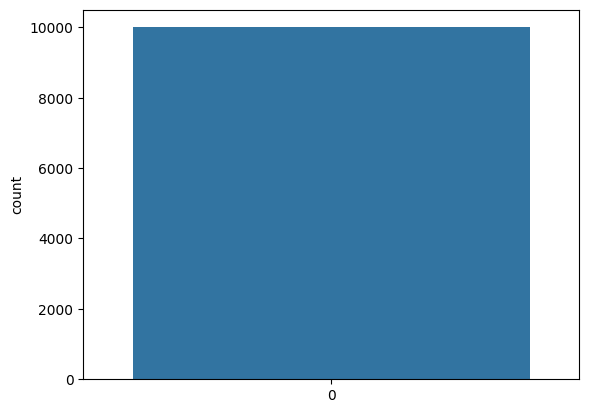

In [69]:
sns.countplot(data['Exited'])

In [70]:
x=data.drop('Exited',axis=1)
y=data['Exited']

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Handling unbalanced data using SMTO

In [71]:
from imblearn.over_sampling import SMOTE

# Assuming x and y are your feature and target variables
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

splitting dataset into the training datset and testing dataset

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [73]:
#feature scallings
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)
print(x_train)

[[ 1.16711761  0.70386567  0.07041188 ... -0.5744499  -0.46400535
  -0.83803236]
 [ 1.09083357  0.10356786 -1.39955512 ... -0.5744499  -0.46400535
   1.19327134]
 [-0.58741535 -0.59677958 -1.03206337 ... -0.5744499  -0.46400535
   1.19327134]
 ...
 [ 0.19722051  0.2036175   1.17288713 ... -0.5744499  -0.46400535
   1.19327134]
 [ 0.85108372  1.80441166  1.17288713 ... -0.5744499  -0.46400535
  -0.83803236]
 [ 0.52415212  1.00401458 -1.39955512 ...  1.74079583 -0.46400535
   1.19327134]]


In [74]:


cat_col = data.select_dtypes(include=['object', 'category']).columns.to_list()
model = CatBoostClassifier(random_seed=12,
                           cat_features=cat_col,
                           verbose=100,
                           n_estimators=1000)

model.fit(x_train, y_train)
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Learning rate set to 0.030538
0:	learn: 0.6739980	total: 5.65ms	remaining: 5.65s
100:	learn: 0.3797063	total: 533ms	remaining: 4.74s
200:	learn: 0.3533602	total: 1.08s	remaining: 4.28s
300:	learn: 0.3375971	total: 1.6s	remaining: 3.72s
400:	learn: 0.3230380	total: 2.52s	remaining: 3.77s
500:	learn: 0.3096070	total: 3.88s	remaining: 3.86s
600:	learn: 0.2983129	total: 4.53s	remaining: 3.01s
700:	learn: 0.2884082	total: 5.06s	remaining: 2.16s
800:	learn: 0.2789016	total: 5.57s	remaining: 1.38s
900:	learn: 0.2704125	total: 6.09s	remaining: 669ms
999:	learn: 0.2622014	total: 6.61s	remaining: 0us
Accuracy: 0.8610
ROC AUC: 0.9355

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1633
           1       0.86      0.86      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

